In [2]:
import pandas as pd
from sql_functions import get_dataframe
import matplotlib.pyplot as plt
import numpy as np

In [3]:
schema = 'cgn_analytics_23_2'
airports_df = get_dataframe(f'SELECT * FROM {schema}.flights_g1_clean')

In [4]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205055 entries, 0 to 205054
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   flight_date            205055 non-null  datetime64[ns]
 1   airline                205055 non-null  object        
 2   tail_number            199883 non-null  object        
 3   flight_number          205055 non-null  int64         
 4   origin                 205055 non-null  object        
 5   dest                   205055 non-null  object        
 6   distance               205055 non-null  float64       
 7   cancelled              205055 non-null  int64         
 8   diverted               205055 non-null  int64         
 9   dep_time_t             193093 non-null  object        
 10  sched_dep_time_t       205055 non-null  object        
 11  dep_delay_t            193092 non-null  object        
 12  arr_time_t             192968 non-null  obje

In [5]:
# create df with only cancelled flights in aug & sep of all airports
airports_can_df = airports_df.query('cancelled == 1')
airports_can_df.head()

,flight_date,airline,tail_number,flight_number,origin,dest,distance,cancelled,diverted,dep_time_t,sched_dep_time_t,dep_delay_t,arr_time_t,sched_arr_time_t,arr_delay_t,air_time_t,actual_elapsed_time_t
0,2017-09-10,AA,N813AA,1942,JAX,CLT,328.0,1,0,None,06:50:00,None,None,08:21:00,None,None,None
1,2017-09-10,AA,N819AA,1958,JAX,CLT,328.0,1,0,None,13:50:00,None,None,15:16:00,None,None,None
2,2017-09-10,AA,None,2012,CLT,MCO,468.0,1,0,None,22:20:00,None,None,23:57:00,None,None,None
3,2017-09-09,AA,None,2015,CLT,PBI,590.0,1,0,None,20:11:00,None,None,22:00:00,None,None,None
4,2017-09-11,AA,N704AA,2031,JAX,CLT,328.0,1,0,None,09:00:00,None,None,10:26:00,None,None,None


In [6]:
airports_can_df = airports_df.query('cancelled == 1')
airports_can_df.head()

,flight_date,airline,tail_number,flight_number,origin,dest,distance,cancelled,diverted,dep_time_t,sched_dep_time_t,dep_delay_t,arr_time_t,sched_arr_time_t,arr_delay_t,air_time_t,actual_elapsed_time_t
0,2017-09-10,AA,N813AA,1942,JAX,CLT,328.0,1,0,None,06:50:00,None,None,08:21:00,None,None,None
1,2017-09-10,AA,N819AA,1958,JAX,CLT,328.0,1,0,None,13:50:00,None,None,15:16:00,None,None,None
2,2017-09-10,AA,None,2012,CLT,MCO,468.0,1,0,None,22:20:00,None,None,23:57:00,None,None,None
3,2017-09-09,AA,None,2015,CLT,PBI,590.0,1,0,None,20:11:00,None,None,22:00:00,None,None,None
4,2017-09-11,AA,N704AA,2031,JAX,CLT,328.0,1,0,None,09:00:00,None,None,10:26:00,None,None,None


In [7]:
# count all cancelled flights in aug & sep of all airports
airports_can_df['flight_date'].count()

12036

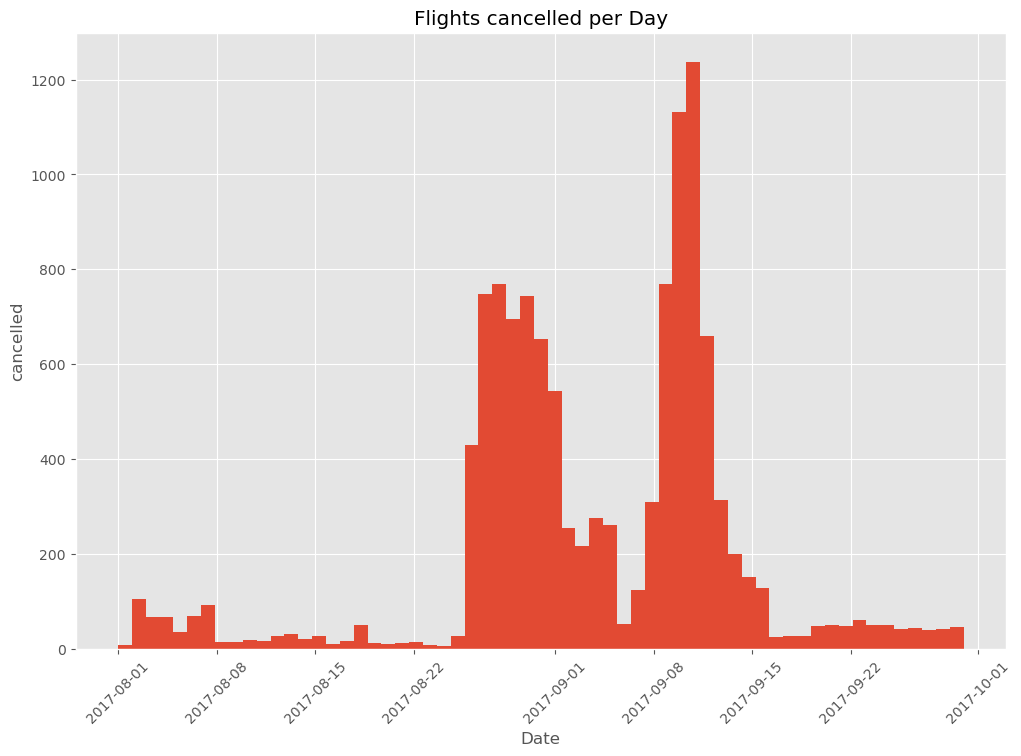

In [8]:
# create histogram of all cancelled flights in aug & sep of all airports

# Use predefined style ggplot
plt.style.use('ggplot') 

# Set figure size
plt.figure(figsize=(12, 8))

# Create histogram by specifying x-value
plt.hist(x = airports_can_df['flight_date'], bins=61)

plt.xticks(rotation=45)

# Label your axes
plt.xlabel("Date")
plt.ylabel("cancelled")

# Set title
plt.title("Flights cancelled per Day")

# Show graphic
plt.show()

In [9]:
airports=['IAH', 'DFW', 'MCO', 'MIA', 'MSY', 'CLT']

In [10]:
#create dataframe of cancelled flights for individual airports

for ap in airports:
    exec(f'{ap}_can_df = airports_can_df.query("origin == \'{ap}\' or dest == \'{ap}\'")')
#HOU_can_df = airports_can_df.query(f'origin == {ap} or dest == {ap}')

In [11]:
#create count of cancelled flights for individual airports
for ap in airports:
    exec(f'print(\'{ap}\', {ap}_can_df["flight_date"].count())')

IAH 5645
DFW 1011
MCO 2946
MIA 2277
MSY 575
CLT 850


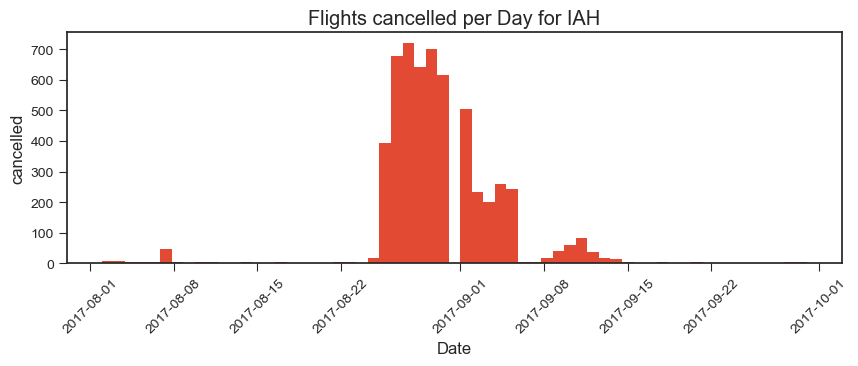

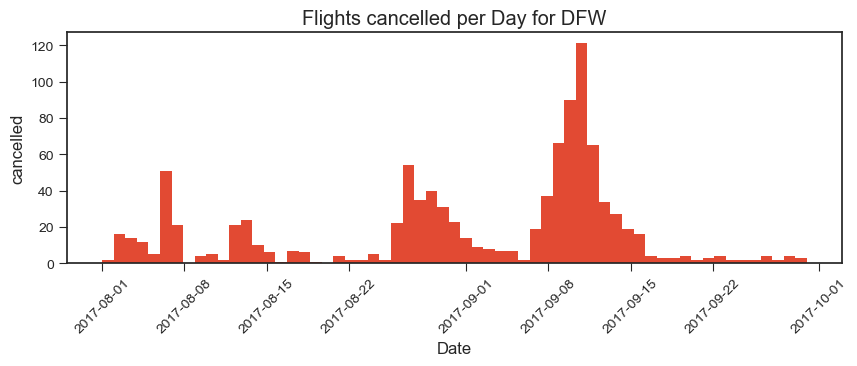

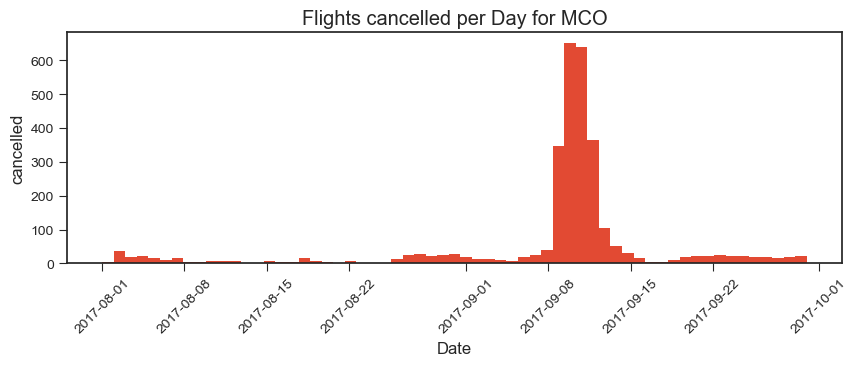

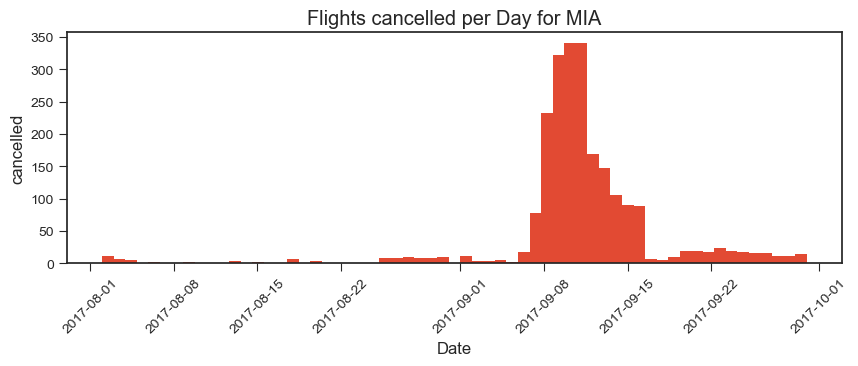

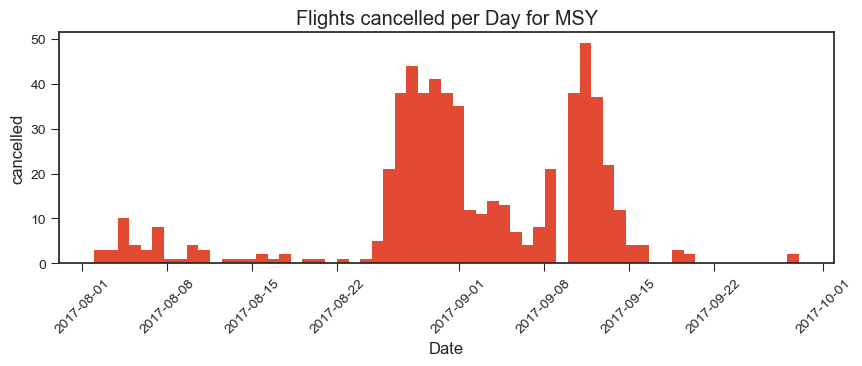

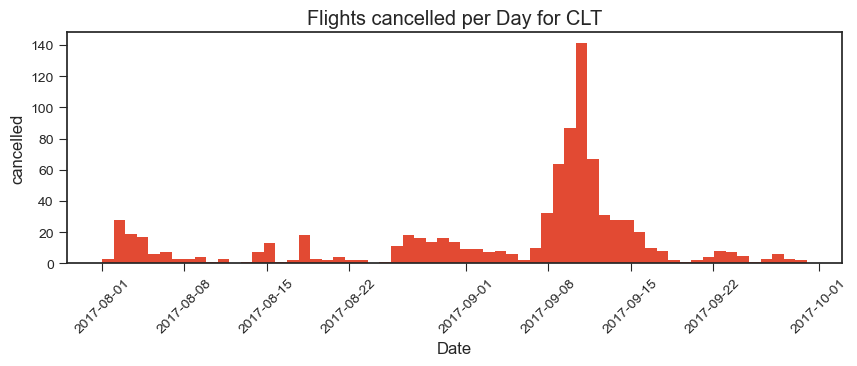

In [14]:
#create histograms of cancelled flights for individual airports
for ap in airports:
    exec(f'plt.style.use("seaborn-v0_8-ticks")\nplt.figure(figsize=(10, 3))
         \nplt.hist(x = {ap}_can_df["flight_date"], bins=61)
        \nplt.xticks(rotation=45)\nplt.xlabel("Date")
        \nplt.ylabel("cancelled")\nplt.title("Flights cancelled per Day for {ap}")\n')
plt.show()